In [4]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = 'Sample Media Spend Data.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df['Calendar_Week'] = pd.to_datetime(df['Calendar_Week'], format="%m/%d/%Y", errors='coerce')
df.head()

,Division,Calendar_Week,Paid_Views,Organic_Views,Google_Impressions,Email_Impressions,Facebook_Impressions,Affiliate_Impressions,Overall_Views,Sales
0,A,2018-01-06,392,422,408,349895.0107,73580,12072,682,59417
1,A,2018-01-13,787,904,110,506270.2176,11804,9499,853,56806
2,A,2018-01-20,81,970,742,430042.1538,52232,17048,759,48715
3,A,2018-01-27,25,575,65,417745.6658,78640,10207,942,72047
4,A,2018-02-03,565,284,295,408505.8012,40561,5834,658,56235


In [6]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Division,3051,0,0.0
Calendar_Week,3051,0,0.0
Paid_Views,3051,0,0.0
Organic_Views,3051,0,0.0
Google_Impressions,3051,0,0.0
Email_Impressions,3051,0,0.0
Facebook_Impressions,3051,0,0.0
Affiliate_Impressions,3051,0,0.0
Overall_Views,3051,0,0.0
Sales,3051,0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Division               3051 non-null   object        
 1   Calendar_Week          3051 non-null   datetime64[ns]
 2   Paid_Views             3051 non-null   int64         
 3   Organic_Views          3051 non-null   int64         
 4   Google_Impressions     3051 non-null   int64         
 5   Email_Impressions      3051 non-null   float64       
 6   Facebook_Impressions   3051 non-null   int64         
 7   Affiliate_Impressions  3051 non-null   int64         
 8   Overall_Views          3051 non-null   int64         
 9   Sales                  3051 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 238.5+ KB


In [8]:
df['Sales'].describe()

count    3.051000e+03
mean     1.859014e+05
std      2.322079e+05
min      1.543600e+04
25%      7.339350e+04
50%      1.135730e+05
75%      2.029755e+05
max      3.575430e+06
Name: Sales, dtype: float64

In [9]:
78946.947473/125822.855219

0.6274452072764483

### Gráfico de Líneas

#### Ventas a lo Largo del Tiempo

Este gráfico te permitirá visualizar cómo han evolucionado las ventas a lo largo del tiempo 

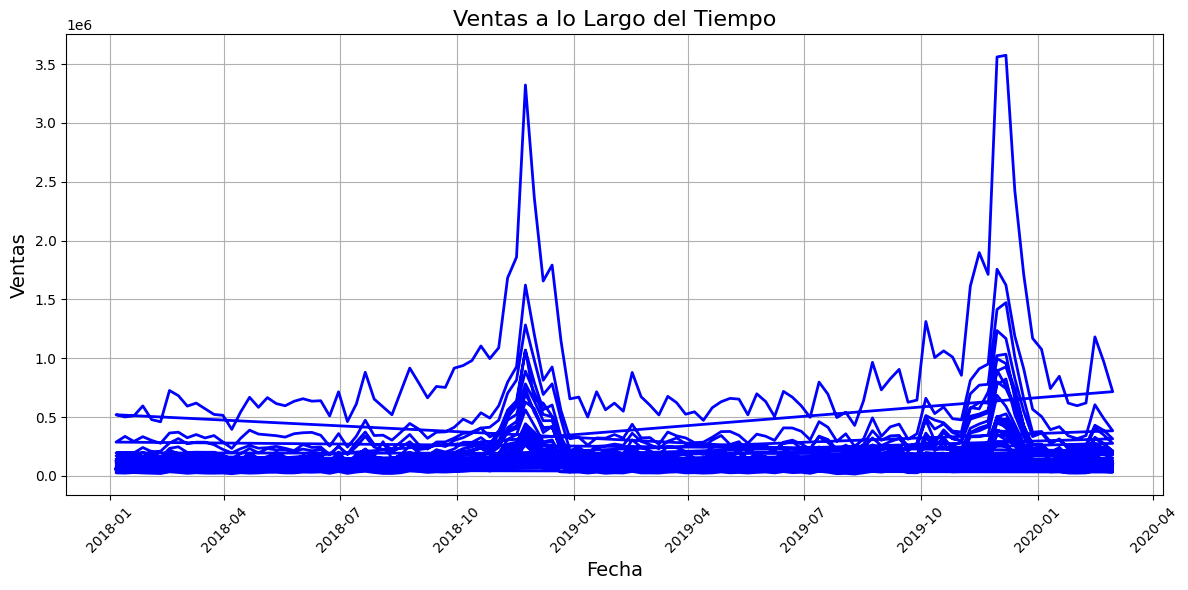

In [10]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de líneas
plt.plot(df['Calendar_Week'], df['Sales'], color='blue', linewidth=2)

# Título y etiquetas
plt.title("Ventas a lo Largo del Tiempo", fontsize=16)
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Mejorar la visualización de las fechas en el eje x
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


#### Ejercicio 1: Replicar gráfico con segmentación de divisiones por rango de ventas

### Histograma: Distribución de Ventas

Este gráfico te permitirá ver la distribución de las ventas y entender su frecuencia.

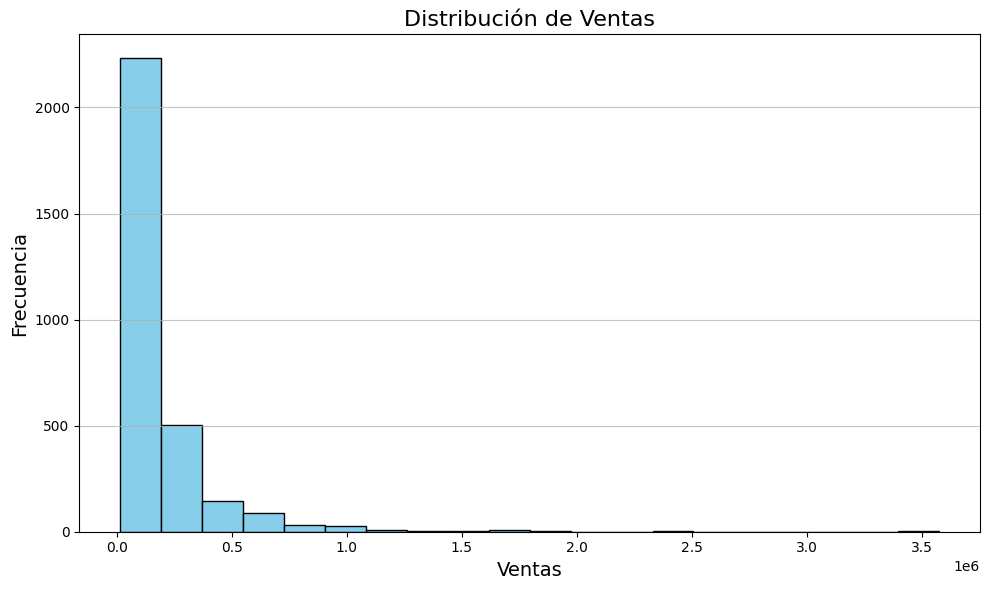

In [11]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el histograma
plt.hist(df['Sales'], bins=20, color='skyblue', edgecolor='black')

# Título y etiquetas
plt.title("Distribución de Ventas", fontsize=16)
plt.xlabel("Ventas", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)

# Mostrar el gráfico
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

### Gráfico de Dispersión

Este gráfico te ayudará a visualizar la relación entre dos variables, en este caso: las ventas y las vistas generales 

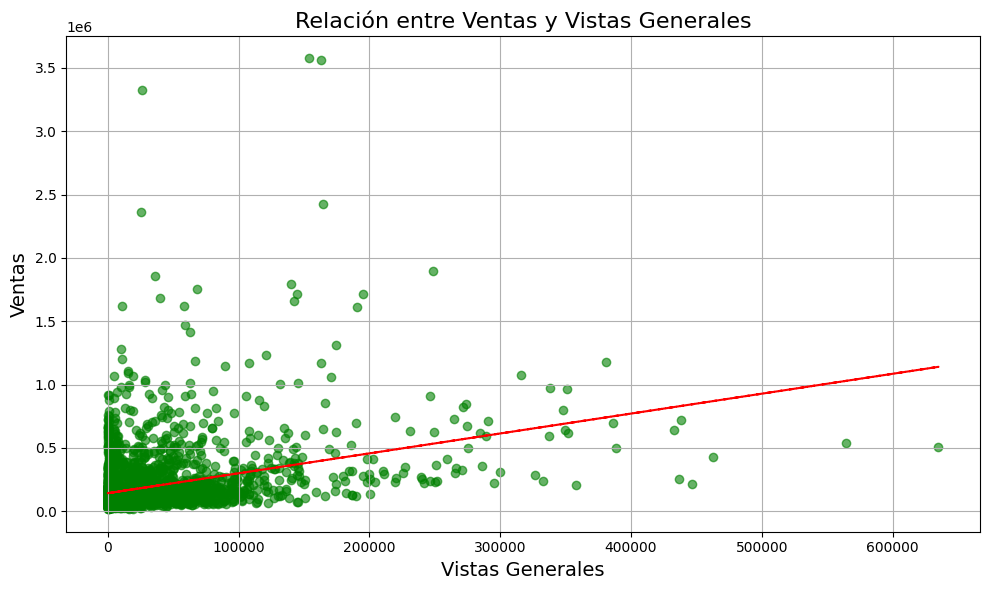

In [12]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df['Overall_Views'], df['Sales'], alpha=0.6, color='green')

# Título y etiquetas
plt.title("Relación entre Ventas y Vistas Generales", fontsize=16)
plt.xlabel("Vistas Generales", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Añadir una línea de tendencia (opcional)
z = np.polyfit(df['Overall_Views'], df['Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Overall_Views'], p(df['Overall_Views']), "r--")

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()


#### Crear el Gráfico de Dispersión: Ventas vs Email_Impressions

A continuación, crearás un gráfico de dispersión para visualizar la relación entre las Ventas y las Impresiones por Email. Además, agregarás una línea de tendencia para facilitar la interpretación

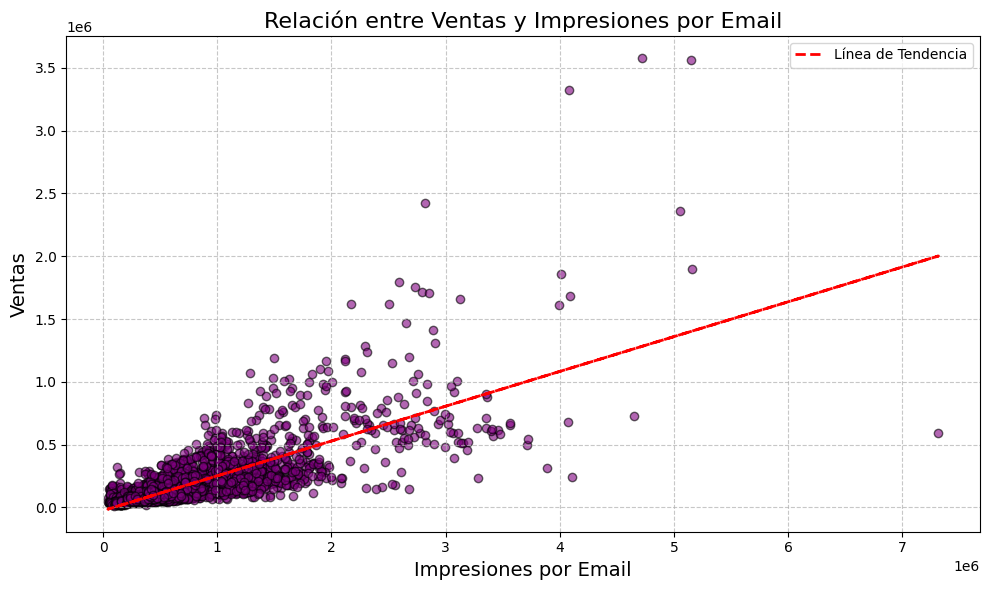

In [13]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(df['Email_Impressions'], df['Sales'], alpha=0.6, color='purple', edgecolor='k')

# Título y etiquetas
plt.title("Relación entre Ventas y Impresiones por Email", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# Añadir una línea de tendencia
# Asegurarse de que no hay valores NaN en las columnas utilizadas
df_clean = df[['Email_Impressions', 'Sales']].dropna()

# Calcular la línea de tendencia
z = np.polyfit(df_clean['Email_Impressions'], df_clean['Sales'], 1)
p = np.poly1d(z)
plt.plot(df_clean['Email_Impressions'], p(df_clean['Email_Impressions']), "r--", linewidth=2, label='Línea de Tendencia')

# Añadir leyenda
plt.legend()

# Mejorar la visualización de los ejes
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


#### Manejar Valores  Atípicos

Es posible que algunos registros tengan valores atípicos en Email_Impressions o Sales. Ya manejamos esto al crear df_clean para la línea de tendencia, pero es recomendable revisar y limpiar los datos según sea necesario.


* Puntos de Dispersión (scatter): Cada punto representa una observación de Email_Impressions y Sales. La posición en el eje X indica las impresiones por email, y la posición en el eje Y indica las ventas correspondientes.

* Línea de Tendencia (trend line): Esta línea muestra la relación general entre Email_Impressions y Sales. Una pendiente positiva indicaría que a mayores impresiones por email, mayores 
ventas, mientras que una pendiente negativa sugeriría lo contrario.

* Transparencia (alpha): Ayuda a visualizar mejor las áreas con alta densidad de puntos, evitando que los puntos se solapen excesivamente

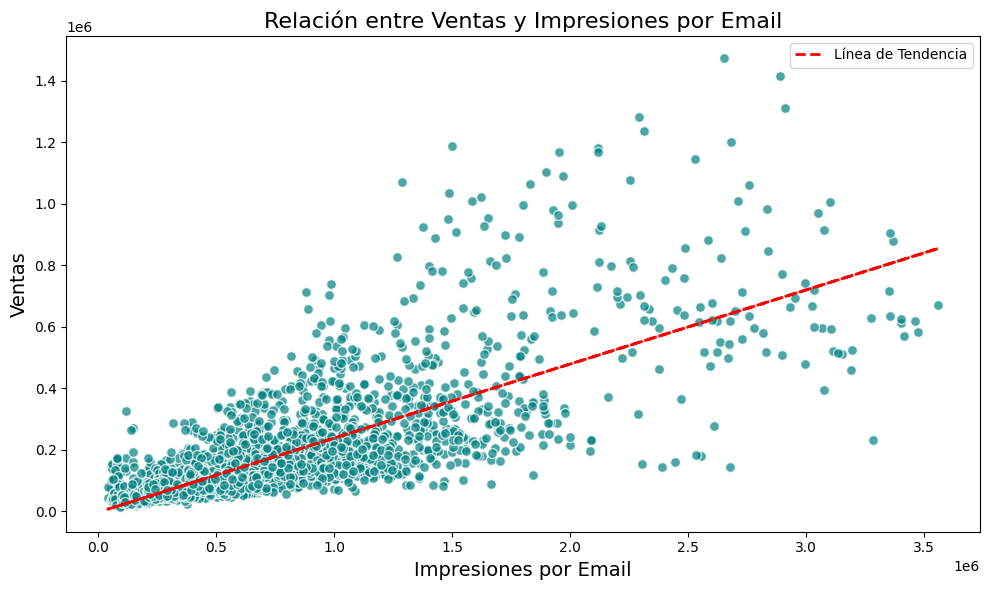

In [14]:
# 1. Manejar valores atípicos
upper_limit_email = df['Email_Impressions'].quantile(0.995)
upper_limit_sales = df['Sales'].quantile(0.995)
df = df[(df['Email_Impressions'] <= upper_limit_email) & (df['Sales'] <= upper_limit_sales)]

# 2. Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Email_Impressions'], df['Sales'], alpha=0.7, color='teal', edgecolor='white',s=50)
plt.title("Relación entre Ventas y Impresiones por Email", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)

# 3. Añadir línea de tendencia
z = np.polyfit(df['Email_Impressions'], df['Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Email_Impressions'], p(df['Email_Impressions']), "r--", linewidth=2, label='Línea de Tendencia')

plt.legend()
plt.grid(True, linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()


#### Añadir una anotación para el punto con la mayor venta

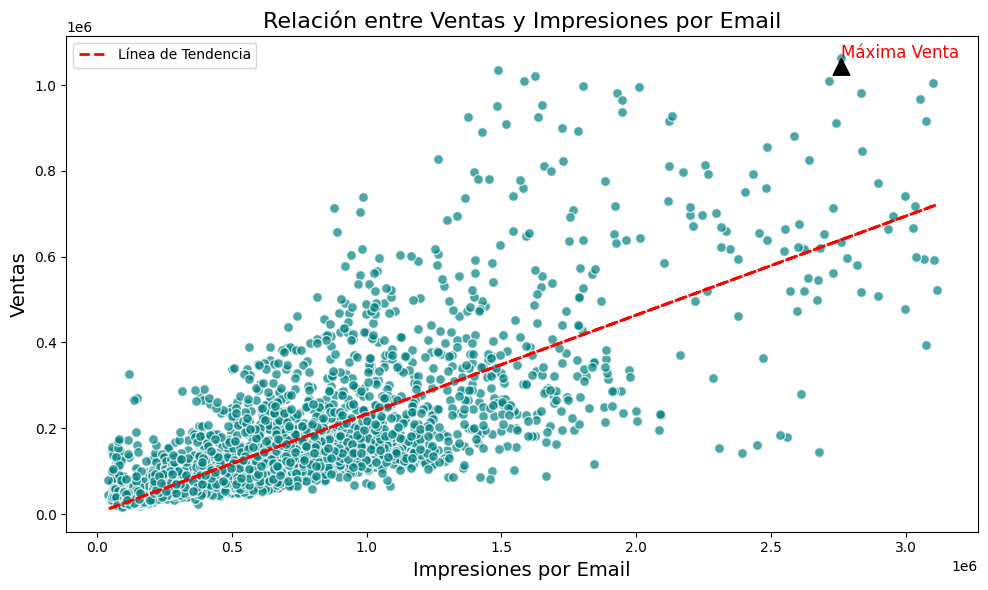

In [15]:
# 1. Manejar valores atípicos
upper_limit_email = df['Email_Impressions'].quantile(0.995)
upper_limit_sales = df['Sales'].quantile(0.995)
df = df[(df['Email_Impressions'] <= upper_limit_email) & (df['Sales'] <= upper_limit_sales)]

# 2. Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df['Email_Impressions'], df['Sales'], alpha=0.7, color='teal', edgecolor='white',s=50)
plt.title("Relación entre Ventas y Impresiones por Email", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)


# Añadir una anotación para el punto con la mayor venta
max_sale = df['Sales'].max()
max_sale_row = df[df['Sales'] == max_sale].iloc[0]
plt.annotate('Máxima Venta',
             xy=(max_sale_row['Email_Impressions'], max_sale_row['Sales']),
             xytext=(max_sale_row['Email_Impressions'] + 100, max_sale_row['Sales'] + 10),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12,
             color='red')

# 3. Añadir línea de tendencia
z = np.polyfit(df['Email_Impressions'], df['Sales'], 1)
p = np.poly1d(z)
plt.plot(df['Email_Impressions'], p(df['Email_Impressions']), "r--", linewidth=2, label='Línea de Tendencia')

plt.legend()
plt.grid(True, linestyle='', alpha=0.7)
plt.tight_layout()
plt.show()

#### Mismo gráfico pero con Seaborn

![Documentación de Seaborn](https://seaborn.pydata.org/)

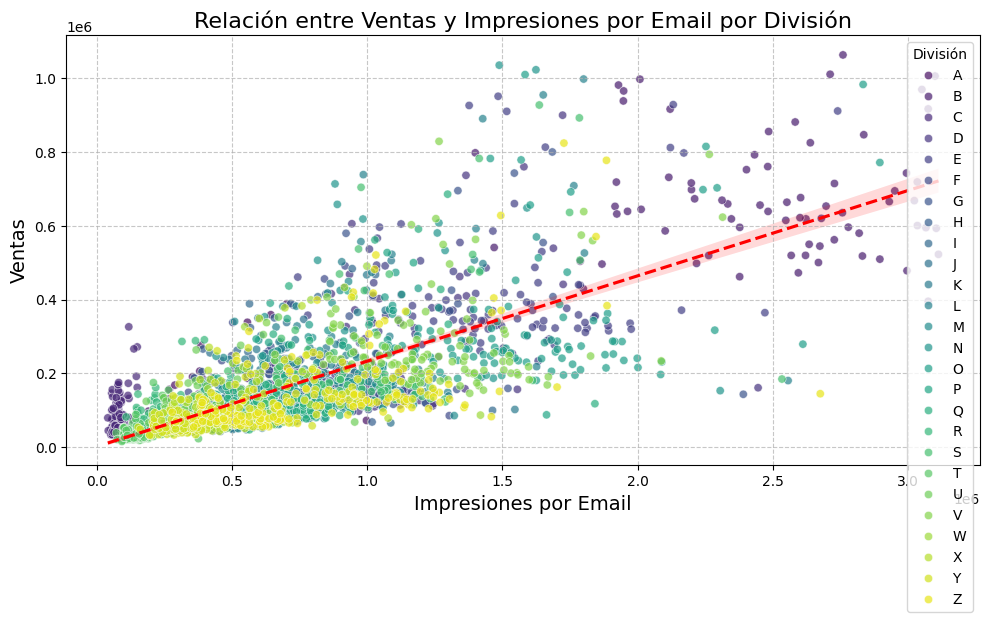

In [16]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Email_Impressions', y='Sales', hue='Division', palette='viridis', alpha=0.7)

# Añadir línea de tendencia
sns.regplot(data=df, x='Email_Impressions', y='Sales', scatter=False, color='red', line_kws={'linestyle':'--'})

plt.title("Relación entre Ventas y Impresiones por Email por División", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)
plt.legend(title='División')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Guardar el Gráfico

Si deseas guardar el gráfico generado en un archivo, puedes utilizar plt.savefig() antes de plt.show()

* 'ventas_vs_email_impressions.png': Nombre y formato del archivo.
*  dpi=300: Resolución de la imagen.
*  bbox_inches='tight': Ajusta los bordes para que el contenido se ajuste perfectamente

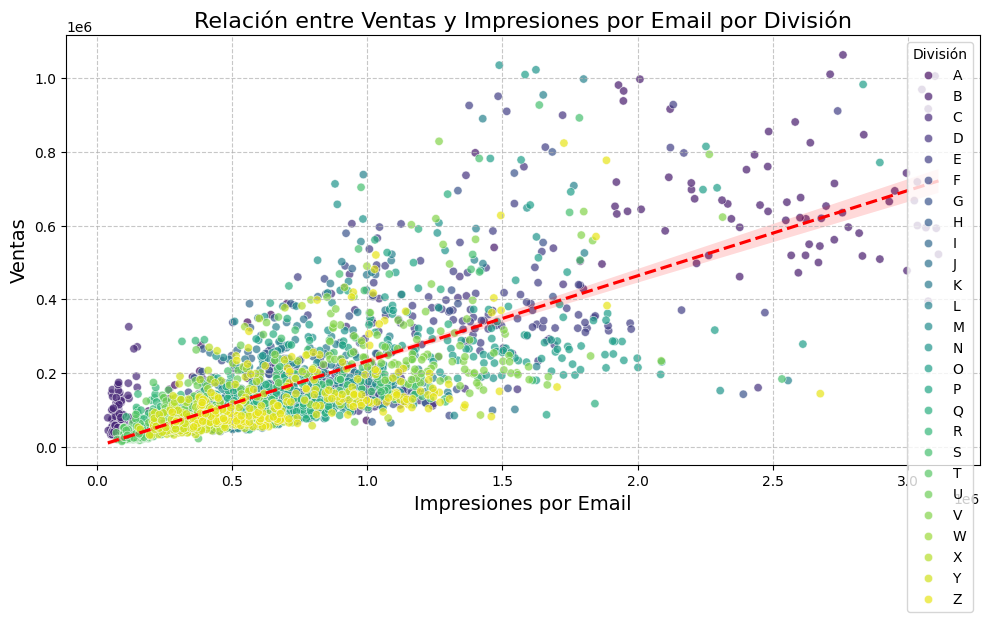

In [18]:
# Crear el gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Email_Impressions', y='Sales', hue='Division', palette='viridis', alpha=0.7)

# Añadir línea de tendencia
sns.regplot(data=df, x='Email_Impressions', y='Sales', scatter=False, color='red', line_kws={'linestyle':'--'})

plt.title("Relación entre Ventas y Impresiones por Email por División", fontsize=16)
plt.xlabel("Impresiones por Email", fontsize=14)
plt.ylabel("Ventas", fontsize=14)
plt.legend(title='División')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('ventas_vs_email_impressions.png', dpi=300, bbox_inches='tight') #linea con la cual guardo gráfico
plt.show()

### Gráfico de Barras: Vistas por División

Comparar las vistas totales por cada división puede ser útil para identificar qué divisiones están generando más tráfico.

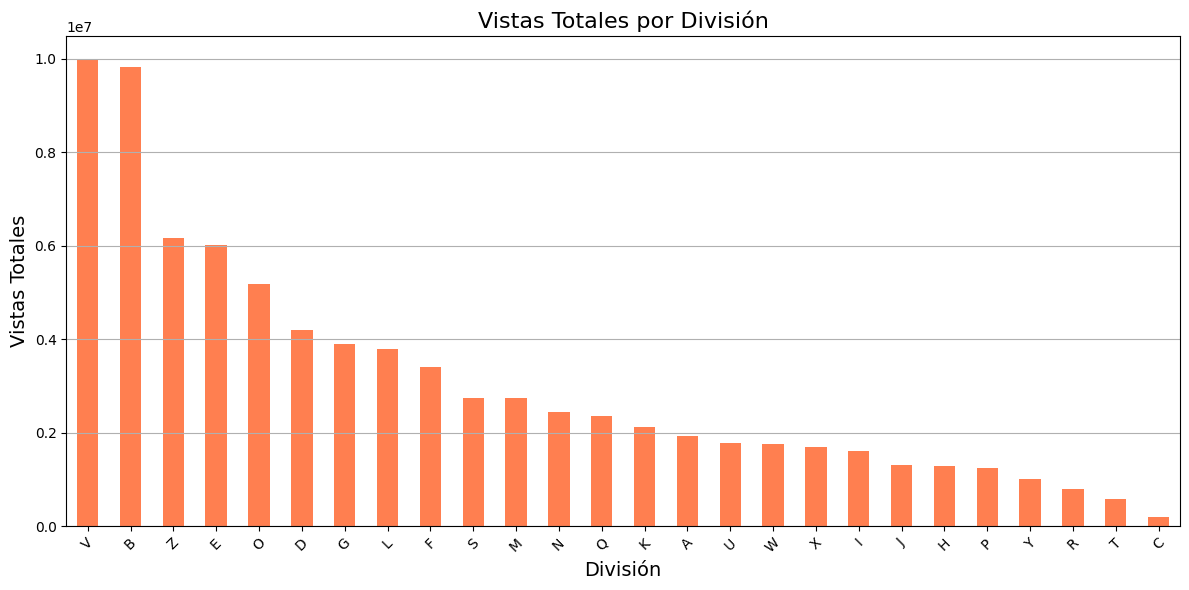

In [19]:
# Agrupar por División y sumar las vistas
vistas_por_division = df.groupby('Division')['Overall_Views'].sum().sort_values(ascending=False)

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
vistas_por_division.plot(kind='bar', color='coral')

# Título y etiquetas
plt.title("Vistas Totales por División", fontsize=16)
plt.xlabel("División", fontsize=14)
plt.ylabel("Vistas Totales", fontsize=14)

# Rotar las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45)
plt.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Gráfico de Pastel: Proporción de Impresiones por Fuente

Visualizar cómo se distribuyen las impresiones entre diferentes fuentes (Google, Email, Facebook, Affiliate)

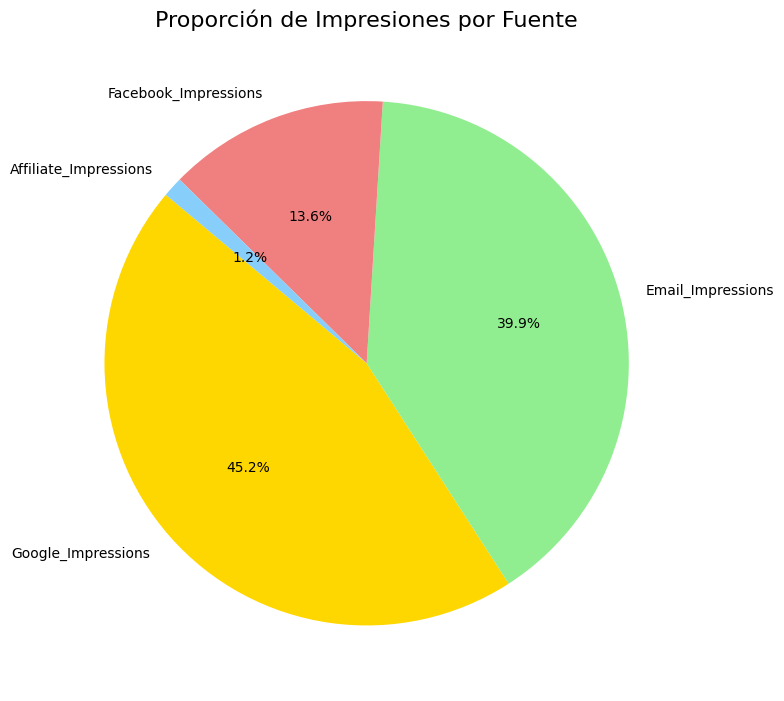

In [20]:
# Calcular las sumas de impresiones por fuente
impresiones = df[['Google_Impressions', 'Email_Impressions', 'Facebook_Impressions', 'Affiliate_Impressions']].sum()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 8))

# Crear el gráfico de pastel
impresiones.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightgreen', 'lightcoral', 'lightskyblue'])

# Título
plt.title("Proporción de Impresiones por Fuente", fontsize=16)

# Eliminar el eje y para una mejor visualización
plt.ylabel('')

# Mostrar el gráfico
plt.tight_layout()
plt.show()
